In [1]:
import time

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from util import display_image

## convolution operator

* cv.filter2D(src, ddepth, kernel\[, dst, anchor, delta, borderType\])
* average blurring

$$
k=\frac{1}{25}
\begin{bmatrix}
1&1&1&1&1\\
1&1&1&1&1\\
1&1&1&1&1\\
1&1&1&1&1\\
1&1&1&1&1
\end{bmatrix}
$$

In [2]:
img = cv.imread('../img/street.jpg')

In [3]:
kernel = np.ones(shape=[5, 5]) / 5**2

In [4]:
blured = cv.filter2D(img, -1, kernel)

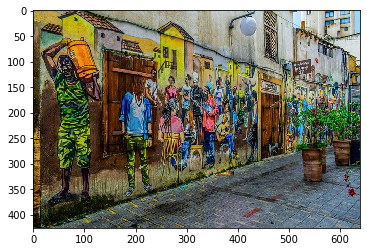

In [5]:
display_image(img)

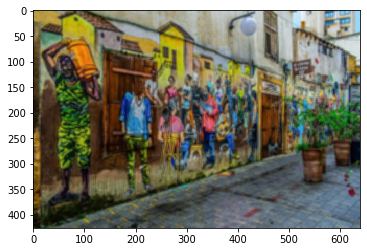

In [6]:
display_image(blured)

## use cv.blur
* cv.blur(src, ksize\[, dst, anchor, borderType\])
* cv.boxFilter(src, ddepth, ksize\[, dst, anchor, normalize, borderType\])

In [7]:
img = cv.imread('../img/street.jpg')

In [8]:
blur1 = cv.blur(img, (10, 10))

In [9]:
blur2 = cv.boxFilter(img, -1, (10, 10))

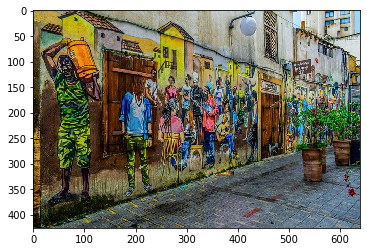

In [10]:
display_image(img)

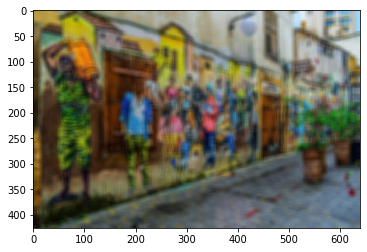

In [11]:
display_image(blur1)

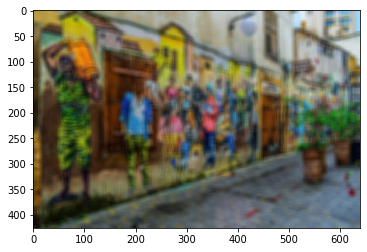

In [12]:
display_image(blur2)

In [13]:
np.abs((blur1 - blur2)).max()

0

## gaussian blurring
- large values on center of the kernel and getting smaller as the distance from the center point increases

$$
k=\frac{1}{9}
\begin{bmatrix}
1&2&1\\
2&4&2\\
1&2&1
\end{bmatrix}
$$

- cv.GaussianBlur(src, ksize, sigmaX\[, sigmaY, borderType\])
    - sigmaX: standard deviation in x-axis (0: auto)
    - sigmaY: standard deviation in y-axis (0: auto)
    - borderType: border correction method

In [14]:
img = cv.imread('../img/gaussian_noise.jpg')

In [15]:
k1 = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1],
]) * (1/16)

In [16]:
blur1 = cv.filter2D(img, -1, k1)

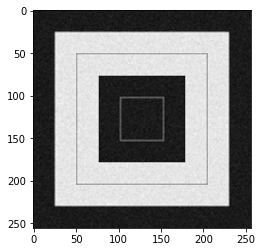

In [17]:
display_image(blur1)

In [18]:
k2 = cv.getGaussianKernel(3, 0)

In [19]:
blur2 = cv.filter2D(img, -1, k2*k2.T)

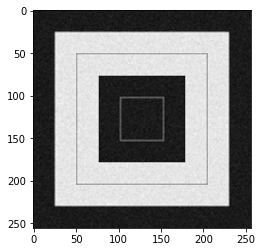

In [20]:
display_image(blur2)

In [21]:
blur3 = cv.GaussianBlur(img, (3, 3), 0)

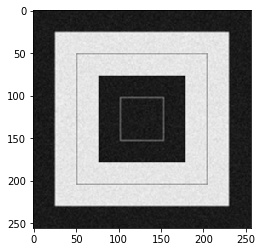

In [22]:
display_image(blur3)

In [23]:
np.abs(blur1 - blur2).max()

0

In [24]:
np.abs(blur1 - blur3).max()

255

## median blurring
- use median value corresponding to kernel range
- like sprinkled salt and pepper

In [25]:
img = cv.imread('../img/salt_pepper_noise.jpg')

In [26]:
blur = cv.medianBlur(img, 5)

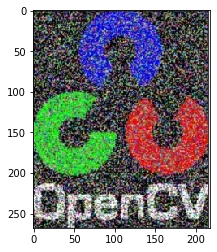

In [27]:
display_image(img)

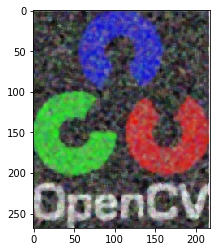

In [28]:
display_image(blur)

## bilateral filter
- blurring filters are usually effective in removing noises but also make edges blurry
- bilateral filter use 1-guassian filter and 2-border filter to improve this problem
- cv.bilateralFilter(src, d, sigmaColor, sigmaSpace\[, dst, borderType\])
    - d: diamter of the filter (very slow for >5)
    - sigmaColor: sigma in color space
    - sigmaSpace: sigma in coordinate space (10~250 is recommended)

In [29]:
img = cv.imread('../img/gaussian_noise.jpg')

In [30]:
blur1 = cv.GaussianBlur(img, (5, 5), 0)

In [31]:
blur2 = cv.bilateralFilter(img, 5, 75, 75)

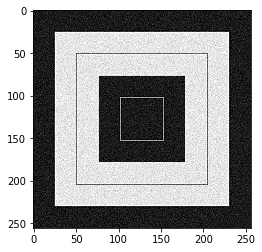

In [32]:
display_image(img)

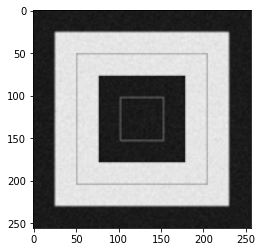

In [33]:
display_image(blur1)

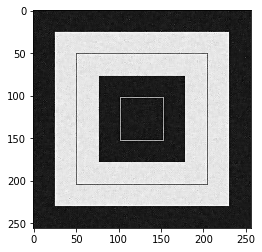

In [34]:
display_image(blur2)

## edge detection
- separating foreground and background
- sharping: making borders clearer
    - opposite to blurring
- wants to find a point where pixel values change greatly
    - idea: use gradient    
$$G_x = \frac{\partial f(x,y)}{\partial x} \approx f_{x+1, y} - f_{x,y}$$
$$G_y = \frac{\partial f(x,y)}{\partial y} \approx f_{x, y+1} - f_{x,y}$$

- gradient filter
$$
G_x=
\begin{bmatrix}
-1&1
\end{bmatrix}
$$

$$
G_y=
\begin{bmatrix}
-1\\
1
\end{bmatrix}
$$

In [35]:
img = cv.imread('../img/sudoku.jpg')

In [36]:
gx_kernel = np.array([[-1, 1]])
gy_kernel = np.array([[-1], [1]])

In [37]:
edge_gx = cv.filter2D(img, -1, gx_kernel)
edge_gy = cv.filter2D(img, -1, gy_kernel)

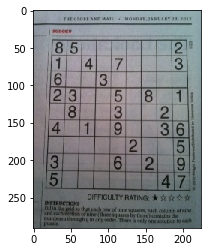

In [38]:
display_image(img)

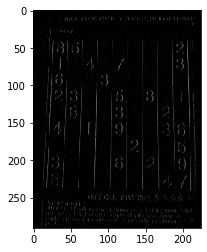

In [39]:
display_image(edge_gx)

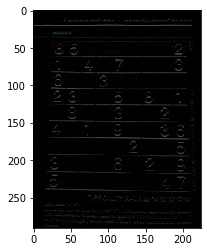

In [40]:
display_image(edge_gy)

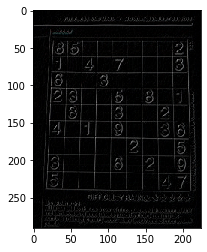

In [41]:
display_image(edge_gx+edge_gy)

## magnitude and direction of edge
- used to find out how similar are given images
$$\text{magnitude} = \sqrt{G_x^2 + G_y^2}$$
$$\text{direction} = arctan\bigg(\frac{G_y}{G_x}\bigg)$$

## Roberts cross filter

- effective in detecting diagonal lines
- but, sensitive to noises and magnitude of edge is small

$$
G_x=
\begin{bmatrix}
1 & 0\\
0 & -1
\end{bmatrix}
$$

$$
G_x=
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix}
$$

In [42]:
img = cv.imread('../img/sudoku.jpg')

In [43]:
gx_kernel = np.array([[1, 0], [0, -1]])
gy_kernel = np.array([[0, 1], [-1, 0]])

In [44]:
edge_gx = cv.filter2D(img, -1, gx_kernel)
edge_gy = cv.filter2D(img, -1, gy_kernel)

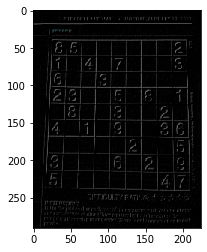

In [45]:
display_image(edge_gx)

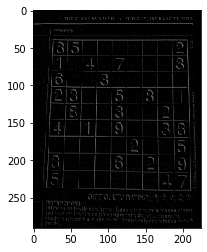

In [46]:
display_image(edge_gy)

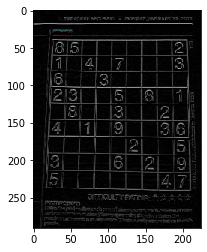

In [47]:
display_image(edge_gx+edge_gy)

## Prewitt filter

- calculate derivatives of each direction 3 times (large magitude)
- weakness in detecting diagonal edges

$$
G_x=
\begin{bmatrix}
-1 & 0 & 1\\
-1 & 0 & 1\\
-1 & 0 & 1\\
\end{bmatrix}
$$

$$
G_x=
\begin{bmatrix}
-1 & -1 & -1\\
0 & 0 & 0\\
1 & 1 & 1\\
\end{bmatrix}
$$

In [48]:
img = cv.imread('../img/sudoku.jpg')

In [49]:
gk_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
gk_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

In [50]:
edge_gx = cv.filter2D(img, -1, gx_kernel)
edge_gy = cv.filter2D(img, -1, gy_kernel)

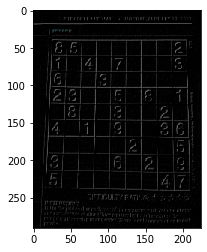

In [51]:
display_image(edge_gx)

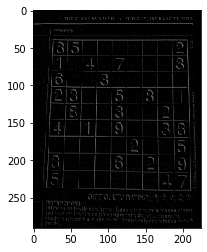

In [52]:
display_image(edge_gy)

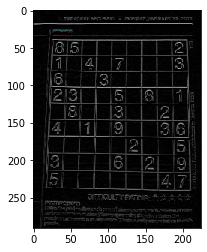

In [53]:
display_image(edge_gx+edge_gy)

## Sobel Filter

- shows overall good performance in horizontal, vertical, diagonal edge detection

$$
G_x=
\begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1\\
\end{bmatrix}
$$

$$
G_x=
\begin{bmatrix}
-1 & -2 & -1\\
0 & 0 & 0\\
1 & 2 & 1\\
\end{bmatrix}
$$

- cv.Sobel(src, ddepth, dx, dyf\[, dst, ksize, scale, delta\])

In [54]:
img = cv.imread('../img/sudoku.jpg')

In [55]:
gx_k = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
gy_k = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In [56]:
edge_gx = cv.filter2D(img, -1, gx_k)
edge_gy = cv.filter2D(img, -1, gy_k)

In [57]:
sobelx = cv.Sobel(img, -1, 1, 0, ksize=3)
sobely = cv.Sobel(img, -1, 0, 1, ksize=3)

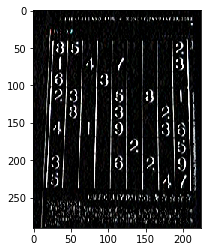

In [58]:
display_image(sobelx)

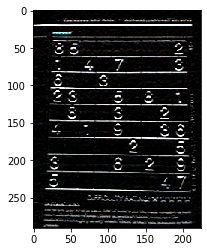

In [59]:
display_image(sobely)

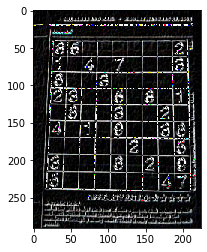

In [60]:
display_image(sobelx+sobely)

In [61]:
np.abs(edge_gx - sobelx).max()

0

## Scharr filter
- improve short-comings of sobel filter (low accuracy when kernel size is too small or large)
- cv.Scharr(src, ddepth, dx, dy\[, dst, scale, delta, borderType\])

## Laplacian filter
- applying 2nd derivative
- cv.Laplacian(src, ddepth\[, dst, ksize, scale, delta, borderType\])

## Canny edge
- use 4-steps (robust to noises)
- algorithm
    - step1: noise reduction
        - 5x5 gaussian blurring filter
    - step2: edge gradient
        - sobel mask
    - step3: non-maximum suprression
        - choose edge which have largest value of each gradient direction and remove remainings
    - step4: hysteresis thresholding
        - set (Max, Min) border constants
        - select border pixels
- cv.Canny(img, threshold1, threshold2, \[, edges, apertureSize, L2gradient\])
    - thres1, thres2: (Min, Max) in step4
    - apertureSize: kernel size in step2
    - L2gradient: gradient flag
        - True: $\sqrt{G_x^2+G_y^2}$
        - False: $|G_x| + |G_y|$

In [62]:
img = cv.imread('../img/sudoku.jpg')

In [63]:
edges = cv.Canny(img, 100, 200)

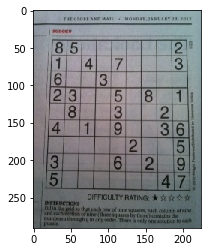

In [64]:
display_image(img)

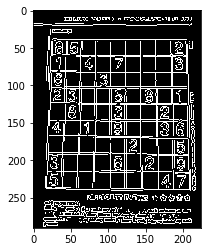

In [65]:
display_image(edges)

## Morphology
- remove noise
- fill holes
- connect boundaries

### 1. erosion
- cv.getStructuringElement(shape, ksize\[, anchor\])
    - shape: cv.MORPH_RECT
    - shape: cv.MORPH_ELLIPSE
    - shape: cv.MORPH_CROSS
    
- cv.erode(src, kernel, \[, anchor, iterations, borderType, borderValue\])

In [66]:
img = cv.imread('../img/morph_dot.png')

In [67]:
k = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))

In [68]:
erosion = cv.erode(img, k )

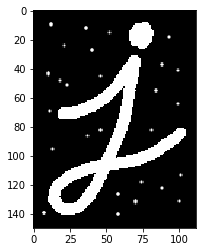

In [69]:
display_image(img)

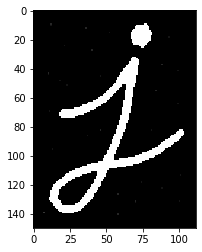

In [70]:
display_image(erosion)

### 2. dilation
- opposite to erosion

In [71]:
img = cv.imread('../img/morph_hole.png')

In [72]:
k = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))

In [73]:
dst = cv.dilate(img, k)

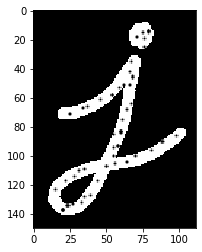

In [74]:
display_image(img)

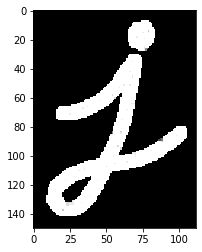

In [75]:
display_image(dst)

### 3. opening, closing
- preserves original shape while removing noises
- opening: erosion + expansion
- closing: expansion + dilation

In [77]:
img1 = cv.imread('../img/morph_dot.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('../img/morph_hole.png', cv.IMREAD_GRAYSCALE)

In [78]:
k = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

In [79]:
opening = cv.morphologyEx(img1, cv.MORPH_OPEN, k)
closing = cv.morphologyEx(img2, cv.MORPH_CLOSE, k)

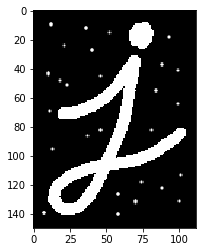

In [80]:
display_image(img1)

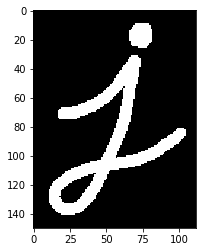

In [81]:
display_image(opening)

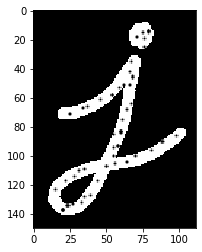

In [83]:
display_image(img2)

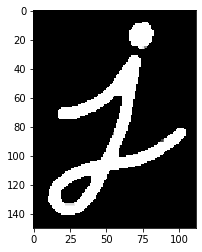

In [82]:
display_image(closing)

## Image Pyramids
- find meaningful structures by shrinking images to lower dimensions